In [2]:

# Import libraries
import pandas as pd
import numpy as np
import pdb
import json
import re
import requests
import sys
import types

In [3]:

# Import libraries
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

In [4]:
#pd.read_csv('https://github.com/IBM/iot-predictive-analytics/blob/master/data/iot_sensor_dataset.csv')

import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/IBM/iot-predictive-analytics/master/data/iot_sensor_dataset.csv"
df_iotdata=pd.read_csv(url,error_bad_lines=False)
df_iotdata.head()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [5]:
X=df_iotdata[["footfall",	"atemp"	,"selfLR"	,"ClinLR"	,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

y_target=df_iotdata['fail']
y_target.head()

X.head()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp
0,0,7,7,1,6,6,36,3,1
1,190,1,3,3,5,1,20,4,1
2,31,7,2,2,6,1,24,6,1
3,83,4,3,4,5,1,28,6,1
4,640,7,5,6,4,0,68,6,1


In [6]:
X.shape

(944, 9)

In [34]:
Xres=X.values.reshape(4248,2)
Xres_pd=pd.DataFrame(Xres)
Xres_pd

,0,1
0,0,7
1,7,1
2,6,6
3,36,3
4,1,190
...,...,...
4243,24,18
4244,7,4
4245,2,6
4246,3,61


In [ ]:
# Function to extract Column names of dataset
def dataset_columns(dataset):
    return list(dataset.columns.values)

# Function to train Logistic regression model
def train_logistic_regression(x_vals, y_vals):
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(x_vals, y_vals)
    return logistic_regression_model

# Function to return Predicted values
def score_data(trained_model, x_vals):
    ypredict = trained_model.predict(x_vals)
    return ypredict

# Function to calculate Prediction accuracy of model
def model_accuracy(trained_model, variables, targets):
    accuracy_score = trained_model.score(variables, targets)
    return accuracy_score

# Function to generate Confusion matrix
def confusion_matrix(actfail, predictfail):
  # Compute Confusion matrix
  print("Actual, Predicted Observations:  ",len(actfail), len(predictfail))
  # print(actfail, predictfail)
  anpn = 0
  anpy = 0
  aypn = 0
  aypy = 0
  
  for i in range(len(actfail)):
      if (actfail[i]==0 and predictfail[i]==0):
          anpn = anpn + 1
      elif (actfail[i]==0 and predictfail[i]==1):
          anpy = anpy + 1
      elif (actfail[i]==1 and predictfail[i]==0):
          aypn = aypn + 1
      else:
          aypy = aypy + 1
  # Confusoin matrix
  print ("--------------------------------------------")
  print ("Confusion Matrix")
  print ("--------------------------------------------")
  print ("              ", "Predicted N", "Predicted Y")
  print ("Actual N      ", anpn,"          ", anpy) 
  print ("Actual Y      ", aypn,"          ", aypy)
  print ("--------------------------------------------")
  print ("Total observations  :  ", anpn+anpy+aypn+aypy)
  print ("False Positives     :  ", anpy)
  print ("False Negatives     :  ", aypn)
  print ("Overall Accuracy    :  ", round((float(anpn+aypy)/float(anpn+anpy+aypn+aypy))*100, 2), "%")
  print ("Sensitivity/Recall  :  ", round((float(aypy)/float(aypn+aypy))*100, 2), "%")
  print ("Specificity         :  ", round((float(anpn)/float(anpn+anpy))*100, 2), "%")
  print ("Precision           :  ", round((float(aypy)/float(anpy+aypy))*100, 2), "%")
  print ("--------------------------------------------")

In [ ]:
# Split Training and Testing data
train_x, test_x, train_y, test_y = train_test_split( X, y_target, test_size=0.33,)
print ("Train x counts : ", len(train_x), len(train_x.columns.values))
print ("Train y counts : ", len(train_y))
 
print ("Test x counts : ", len(test_x), len(test_x.columns.values))
print ("Test y counts : ", len(test_y))

In [ ]:
# Function to train Logistic regression model
def train_logistic_regression(x_vals, y_vals):
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(x_vals, y_vals)
    return logistic_regression_model


#Function to extract Column names of dataset
def dataset_columns(dataset):
    return list(dataset.columns.values)


# Print dataset column names
datacolumns = dataset_columns(df_iotdata)
print ("Data set columns : ", list(datacolumns))

In [ ]:


# Training Logistic regression model
trained_logistic_regression_model = train_logistic_regression(train_x, train_y)

train_accuracy = model_accuracy(trained_logistic_regression_model, train_x, train_y)

# Testing the logistic regression model
test_accuracy = model_accuracy(trained_logistic_regression_model, test_x, test_y)

test_y_pred=trained_logistic_regression_model.predict(test_x)

from sklearn.metrics import f1_score
f1score=f1_score(test_y, test_y_pred, average='weighted' )


print ("Training Accuracy : ", round(train_accuracy * 100, 2), "%")
print ("Test Accuracy : ", round(test_accuracy * 100, 2), "%")
print ("f1 score Accuracy : ", f1score )

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf             

In [ ]:
finalDf = pd.concat([principalDf, df_iotdata[['fail']]], axis = 1)
finalDf

In [ ]:

import matplotlib.pyplot as plt
plt.figure()
fig = plt.figure(figsize = (10,10))
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
fails = [1,0]
colors = ['r', 'g']
for fail, color in zip(fails,colors):
    indicesToKeep = finalDf['fail'] == fail
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
plt.legend(fails)
plt.grid()

In [15]:
finalDf

,principal component 1,principal component 2,fail
0,-306.373114,-10.422879,1
1,-116.361546,-26.710660,0
2,-275.363775,-22.457386,0
3,-223.366661,-18.634984,0
4,333.606850,21.825528,0
...,...,...,...
939,-306.399585,25.644809,1
940,-306.384504,2.697157,1
941,-306.379932,-4.548788,1
942,-306.382024,-1.364708,1


In [16]:
"""
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis  2d",fontsize=20)
targets = [1, 0]
colors = ['r', 'g']
for fail, color in zip(targets,colors):
    indicesToKeep = df_iotdata['fail'] == fail
    plt.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

plt.show()

"""

'\nplt.figure()\nplt.figure(figsize=(10,10))\nplt.xticks(fontsize=12)\nplt.yticks(fontsize=14)\nplt.xlabel(\'Principal Component - 1\',fontsize=20)\nplt.ylabel(\'Principal Component - 2\',fontsize=20)\nplt.title("Principal Component Analysis  2d",fontsize=20)\ntargets = [1, 0]\ncolors = [\'r\', \'g\']\nfor fail, color in zip(targets,colors):\n    indicesToKeep = df_iotdata[\'fail\'] == fail\n    plt.scatter(principalDf.loc[indicesToKeep, \'principal component 1\']\n               , principalDf.loc[indicesToKeep, \'principal component 2\'], c = color, s = 50)\n\nplt.legend(targets,prop={\'size\': 15})\n\nplt.show()\n\n'

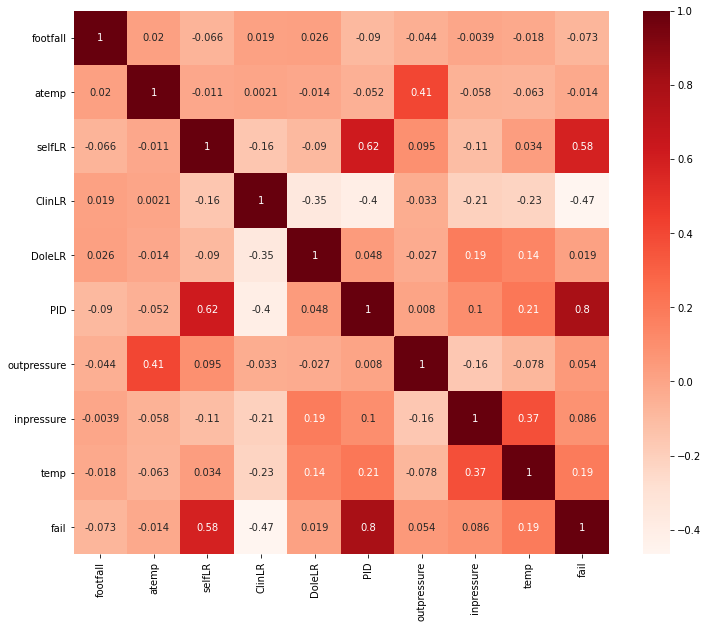

In [17]:
#Using Pearson Correlation
import seaborn as sns

plt.figure(figsize=(12,10))
cor = df_iotdata.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
#pip install seaborn

In [19]:
#Correlation with output variable
cor_target = abs(cor["fail"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

selfLR    0.583238
ClinLR    0.466574
PID       0.797329
temp      0.190257
fail      1.000000
Name: fail, dtype: float64

In [20]:
relevant_features.sort_values( ascending=False)

fail      1.000000
PID       0.797329
selfLR    0.583238
ClinLR    0.466574
temp      0.190257
Name: fail, dtype: float64

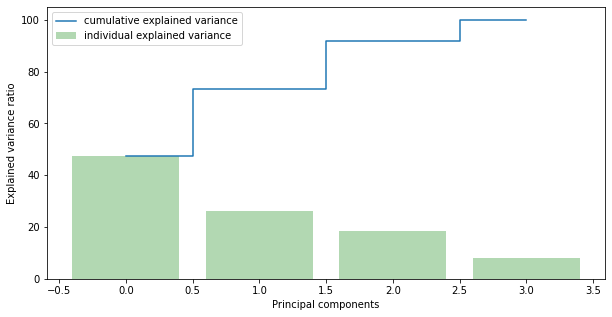

In [21]:
# validate how many pca dimension shpould be to get less loss

from sklearn.preprocessing import StandardScaler

data = df_iotdata[['PID', 'selfLR', 'ClinLR','temp']]
Xx = data.values
X_std = StandardScaler().fit_transform(Xx)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

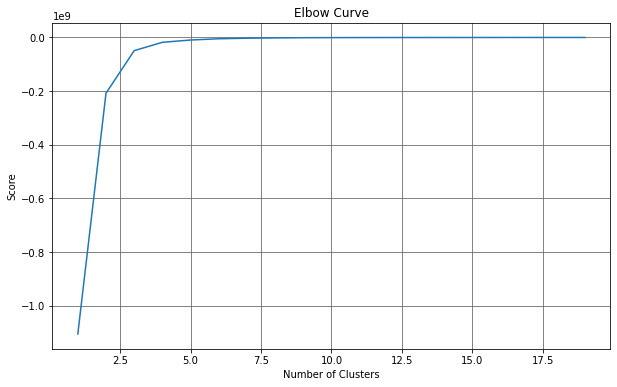

In [22]:
# kmeans cluster
from sklearn.cluster import KMeans

#data = df_iotdata[['PID', 'selfLR', 'ClinLR']]
data = df_iotdata
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

# elbove curve for cluster numbers, to check how many?

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.show();




/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


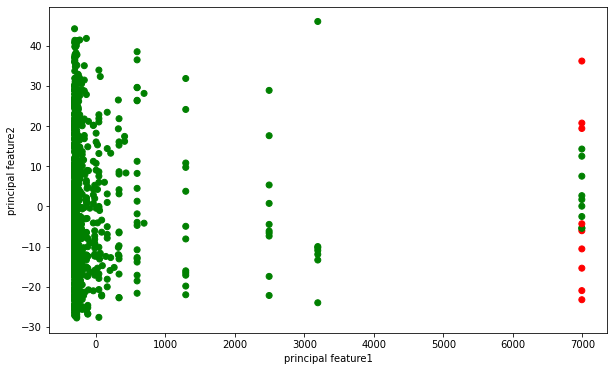

In [23]:

def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[9])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
finalDf['fail'] = (distance >= threshold).astype(int)

# visualisation of anomaly with cluster view
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'green', 1:'red'}
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=finalDf["fail"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

# knn

In [87]:
outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[9])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
finalDf['fail'] = (distance >= threshold).astype(int)

h = .02  # step size in the mesh

# visualisation of anomaly with cluster view
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'green', 1:'red'}
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=finalDf["fail"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')


  
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(finalDf, finalDf['fail'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = finalDf.iloc[:, 0].min() - 1, finalDf.iloc[:, 0].max() + 1
y_min, y_max = finalDf.iloc[:, 1].min() - 1, finalDf.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Zkn = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Zkn = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Zkn, cmap=cmap_light)

plt.show();


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [82]:
finalDf.iloc[0:, 0]

0     -306.373114
1     -116.361546
2     -275.363775
3     -223.366661
4      333.606850
          ...    
939   -306.399585
940   -306.384504
941   -306.379932
942   -306.382024
943   -288.391160
Name: principal component 1, Length: 944, dtype: float64

In [24]:
from sklearn.decomposition import PCA

#pca with 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf_3d = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

principalDf_3d

finalDf_3d = pd.concat([principalDf_3d, df_iotdata[['fail']]], axis = 1)
finalDf_3d

,principal component 1,principal component 2,principal component 3,fail
0,-306.373114,-10.422879,15.297300,1
1,-116.361546,-26.710660,16.342416,0
2,-275.363775,-22.457386,16.023533,0
3,-223.366661,-18.634984,15.969841,0
4,333.606850,21.825528,14.726051,0
...,...,...,...,...
939,-306.399585,25.644809,-8.836980,1
940,-306.384504,2.697157,-8.117523,1
941,-306.379932,-4.548788,-7.878091,1
942,-306.382024,-1.364708,-8.073851,1


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

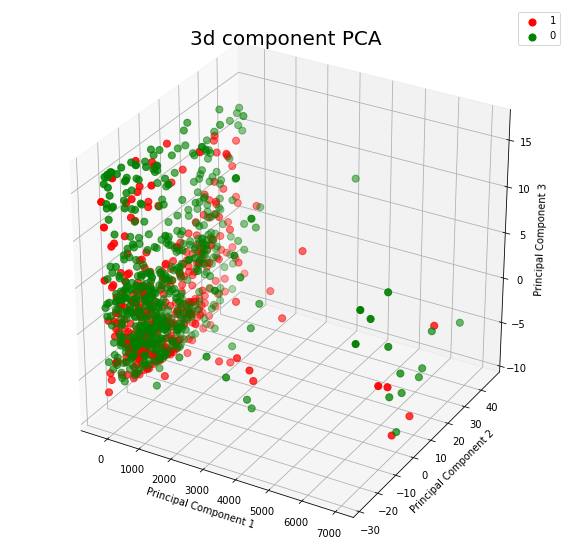

In [25]:
#plot 3d cloud 

#https://towardsdatascience.com/discover-3d-point-cloud-processing-with-python-6112d9ee38e7

import matplotlib.pyplot as plt
plt.figure()
fig = plt.figure(figsize = (10,10))
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

ax = plt.axes(projection='3d')
#plt.xlabel('Principal Component 1', fontsize = 15)
#plt.ylabel('Principal Component 2', fontsize = 15)
#plt.zlabel('Principal Component 3', fontsize = 15)

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)
#ax.set_zlim(0, 10)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
#

ax.set_title('3d component PCA', fontsize = 20)
fails = [1,0]
colors = ['r', 'g']
for fail, color in zip(fails,colors):
    indicesToKeep = finalDf_3d['fail'] == fail
    ax.scatter(finalDf_3d.loc[indicesToKeep, 'principal component 1']
               , finalDf_3d.loc[indicesToKeep, 'principal component 2']
               , finalDf_3d.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
plt.legend(fails)
plt.grid()

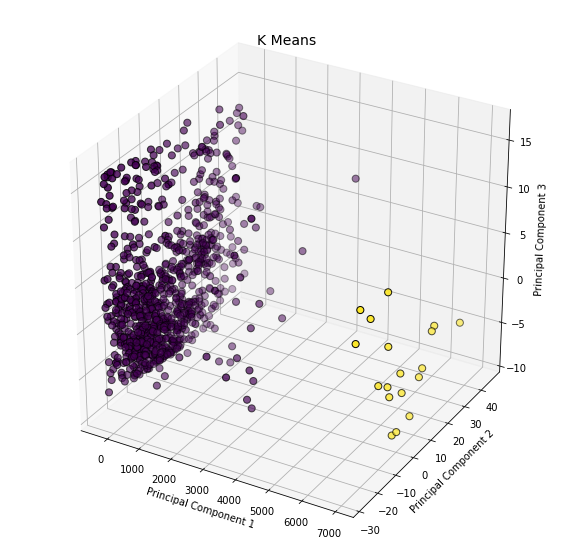

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
#Xkm = df_iotdata[['PID', 'selfLR', 'ClinLR']]
Xkm = finalDf_3d[['principal component 1', 'principal component 2', 'principal component 3']]

Xkm = Xkm.reset_index(drop=True)
km = KMeans(n_clusters=2)
km.fit(Xkm)
km.predict(Xkm)
labels = km.labels_
#Plotting 3d kmeans cloud
fig = plt.figure(1, figsize=(7,7))

ax = plt.axes(projection='3d')

#ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
#ax.scatter(Xkm.iloc[:,0], Xkm.iloc[:,1], Xkm.iloc[:,2],
 #         c=labels.astype(np.float), edgecolor="k")
ax.scatter(Xkm.iloc[:,0], Xkm.iloc[:,1], Xkm.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k",s=50)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title("K Means", fontsize=14);

In [ ]:
###knn  ++++++

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
#Xkm = df_iotdata[['PID', 'selfLR', 'ClinLR']]
Xkm = finalDf_3d[['principal component 1', 'principal component 2', 'principal component 3']]

Xkm = Xkm.reset_index(drop=True)

clf_kn = neighbors.KNeighborsClassifier(15)
clf_kn.fit(Xkm.iloc[:,0], Xkm.iloc[:,1])


km = KMeans(n_clusters=2)
km.fit(Xkm)
km.predict(Xkm)
labels = km.labels_
#Plotting 3d kmeans cloud
fig = plt.figure(1, figsize=(7,7))

ax = plt.axes(projection='3d')

#ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
#ax.scatter(Xkm.iloc[:,0], Xkm.iloc[:,1], Xkm.iloc[:,2],
 #         c=labels.astype(np.float), edgecolor="k")
ax.scatter(Xkm.iloc[:,0], Xkm.iloc[:,1], Xkm.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k",s=50)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title("K Means", fontsize=14);

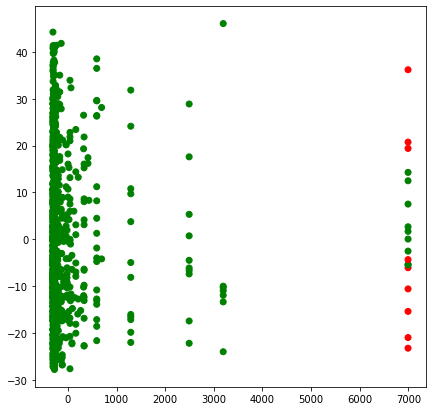

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#fig = plt.figure(figsize = (10,10))
n_neighbors = 15

# import some data to play with
#iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset


Xres_crop = Xres_pd.iloc[:944]
Xh = Xres_crop
yh_resh=y_target.values.reshape(-1)
yh_resh

yh = yh_resh

Xknn = finalDf_3d[['principal component 1', 'principal component 2', 'principal component 3']]

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ['darkorange',  'darkblue']

#for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
  #  clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
  #  clf.fit(Xh, yh)


colors = {0:'green', 1:'red'}
#ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=finalDf["fail"].apply(lambda x: colors[x]))

clf = KNeighborsClassifier(15)
clf.fit(Xh, yh)
y_score = clf.predict_proba(Xh)[:, 1]
fig = plt.figure(1, figsize=(7,7))
plt.scatter(
     Xknn.iloc[:,0], Xknn.iloc[:,1],
    c=finalDf["fail"].apply(lambda x: colors[x]))
     
  #  labels={'symbol': 'label', 'color': 'score of <br>first class'}


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    #x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   # y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       #  np.arange(y_min, y_max, h))

    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
 #   Z = Z.reshape(xx.shape)
 #   plt.figure(figsize=(8, 6))
   # plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
  #  sns.scatterplot(x=Xh[:, 0], y=Xh[:, 1],
                 #   palette=cmap_bold, alpha=1.0, edgecolor="black")
    #plt.xlim(xx.min(), xx.max())
    #plt.ylim(yy.min(), yy.max())
  #  plt.title("3-Class classification (k = %i, weights = '%s')"
           #   % (n_neighbors, weights))
    #plt.xlabel(iris.feature_names[0])
    #plt.ylabel(iris.feature_names[1])

#plt.show()
plt.show()

In [59]:
Xknn.iloc[:,0]

0     -306.373114
1     -116.361546
2     -275.363775
3     -223.366661
4      333.606850
          ...    
939   -306.399585
940   -306.384504
941   -306.379932
942   -306.382024
943   -288.391160
Name: principal component 1, Length: 944, dtype: float64

In [27]:
X

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp
0,0,7,7,1,6,6,36,3,1
1,190,1,3,3,5,1,20,4,1
2,31,7,2,2,6,1,24,6,1
3,83,4,3,4,5,1,28,6,1
4,640,7,5,6,4,0,68,6,1
...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24
940,0,7,5,2,6,6,50,6,24
941,0,3,6,2,7,5,43,6,24
942,0,6,6,2,5,6,46,7,24


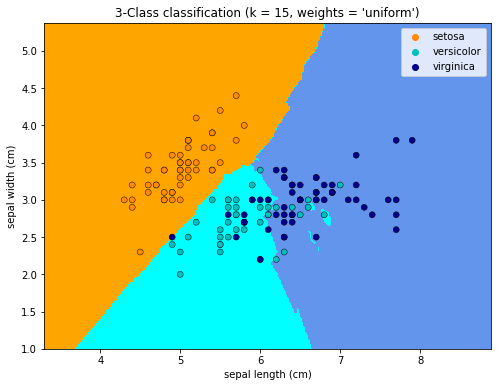

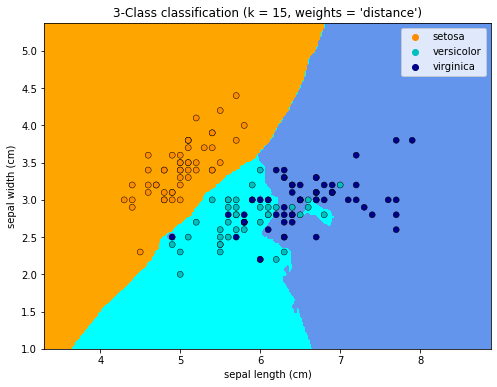

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
Xi = iris.data[:, :2]
yi = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(Xi, yi)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = Xi[:, 0].min() - 1, Xi[:, 0].max() + 1
    y_min, y_max = Xi[:, 1].min() - 1, Xi[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=Xi[:, 0], y=Xi[:, 1], hue=iris.target_names[yi],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

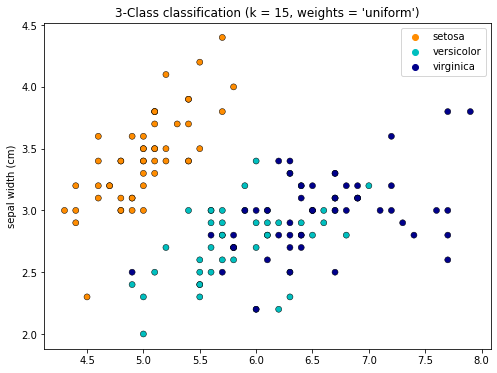

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
Xi = iris.data[:, :2]
yi = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

#for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(Xi, yi)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
#x_min, x_max = Xi[:, 0].min() - 1, Xi[:, 0].max() + 1
#y_min, y_max = Xi[:, 1].min() - 1, Xi[:, 1].max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                   #      np.arange(y_min, y_max, h))
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = clf.predict(Xi,yi)
    # Put the result into a color plot
#Z = Z.reshape(Xi.shape)
plt.figure(figsize=(8, 6))
    #plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
sns.scatterplot(x=Xi[:, 0], y=Xi[:, 1], hue=iris.target_names[yi],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'uniform'))
    #plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

In [74]:
Xi[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [66]:
Xi.shape


(150, 2)

In [72]:
Xres.shape
Xres

array([[ 0,  7],
       [ 7,  1],
       [ 6,  6],
       ...,
       [ 2,  6],
       [ 3, 61],
       [ 7, 24]])

In [30]:
yi.shape
yi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
y_target.shape

(944,)

In [1]:
Xi

NameError: name 'Xi' is not defined

In [ ]:
yi

In [71]:
y_target

0      1
1      0
2      0
3      0
4      0
      ..
939    1
940    1
941    1
942    1
943    1
Name: fail, Length: 944, dtype: int64

In [39]:
yh_resh=yh.values.reshape(-1)
yh_resh


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [42]:
Xh

,0,1
0,0,7
1,7,1
2,6,6
3,36,3
4,1,190
...,...,...
939,37,5
940,12,470
941,7,5
942,5,2


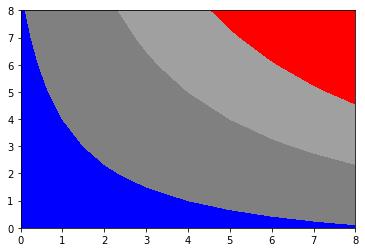

In [65]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()